In [ ]:
#Import training data and convert it to dataframe

import io
import pandas as pd
import numpy as np
import csv

df= pd.DataFrame()
df= pd.read_csv('/content/drive/MyDrive/clothing_data_new2.csv',index_col=False, encoding='utf-8')
df =pd.DataFrame(df)
#df =np.asarray(df)
#df.shape
df

,product_name,category,price,Brand,Url
0,Devil's Advocate bright puppytooth print overcoat,men_apparels,£58.50,Devils Advocate,https://www.asos.com/devils-advocate/devils-ad...
1,adidas Originals 'adicolor 70s' unisex cropped...,men_apparels,£30.50,adidas Originals,https://www.asos.com/adidas-originals/adidas-o...
2,Bolongaro Trevor smart trouser in navy pinstripe,men_apparels,£24.00,Bolongaro Trevor,https://www.asos.com/bolongaro-trevor/bolongar...
3,adidas Originals Hyperturf trainers in triple ...,men_apparels,£63.00,adidas Originals,https://www.asos.com/adidas-originals/adidas-o...
4,ADPT oversized cotton poplin shirt with pocket...,men_apparels,£15.50,ADPT,https://www.asos.com/adpt/adpt-oversized-cotto...
...,...,...,...,...,...
8482,Clovia Red Check Thongs Panty,Womens_nightwear,₹254,Clovia,https://www.tatacliq.com/clovia-red-check-thon...
8483,Clovia Red Cotton Full Coverage Bra,Womens_nightwear,₹329,Clovia,https://www.tatacliq.com/clovia-red-cotton-ful...
8484,Clovia Teal Printed Full Coverage Push-Up Bra,Womens_nightwear,₹623,Clovia,https://www.tatacliq.com/clovia-teal-printed-f...
8485,Clovia White Animal Print Hipster Panty,Womens_nightwear,₹244,Clovia,https://www.tatacliq.com/clovia-white-animal-p...


In [ ]:
#Removing duplicate rows in the dataframe
duplicate_rows=df[df.Url.duplicated()]
#print('duplicate rows:', duplicate_rows)
len(duplicate_rows.Url)

18

In [ ]:
#df.sort_values('Url', inplace=True)
df.drop_duplicates(subset='Url', keep= 'first', inplace=True)
df

,product_name,category,price,Brand,Url
0,Devil's Advocate bright puppytooth print overcoat,men_apparels,£58.50,Devils Advocate,https://www.asos.com/devils-advocate/devils-ad...
1,adidas Originals 'adicolor 70s' unisex cropped...,men_apparels,£30.50,adidas Originals,https://www.asos.com/adidas-originals/adidas-o...
2,Bolongaro Trevor smart trouser in navy pinstripe,men_apparels,£24.00,Bolongaro Trevor,https://www.asos.com/bolongaro-trevor/bolongar...
3,adidas Originals Hyperturf trainers in triple ...,men_apparels,£63.00,adidas Originals,https://www.asos.com/adidas-originals/adidas-o...
4,ADPT oversized cotton poplin shirt with pocket...,men_apparels,£15.50,ADPT,https://www.asos.com/adpt/adpt-oversized-cotto...
...,...,...,...,...,...
8482,Clovia Red Check Thongs Panty,Womens_nightwear,₹254,Clovia,https://www.tatacliq.com/clovia-red-check-thon...
8483,Clovia Red Cotton Full Coverage Bra,Womens_nightwear,₹329,Clovia,https://www.tatacliq.com/clovia-red-cotton-ful...
8484,Clovia Teal Printed Full Coverage Push-Up Bra,Womens_nightwear,₹623,Clovia,https://www.tatacliq.com/clovia-teal-printed-f...
8485,Clovia White Animal Print Hipster Panty,Womens_nightwear,₹244,Clovia,https://www.tatacliq.com/clovia-white-animal-p...


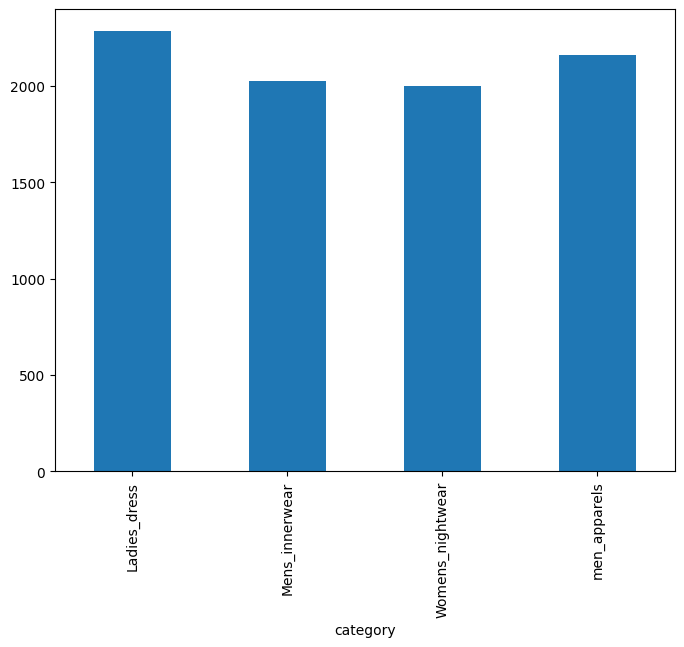

In [ ]:
#Check if data is imbalanced

import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,6))
df.groupby('category').category.count().plot.bar(ylim=0)
plt.show()


In [ ]:
duplicate_rows=df[df.duplicated()]
#print('duplicate rows:', duplicate_rows)
len(duplicate_rows.Url)

0

In [ ]:
#Remove stopwords and special charactes from the dataframe
import nltk
import codecs
import string
nltk.download("stopwords")
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize


df.columns= ['product_name', 'category', 'price','Brand','Url']
#type(df.columns)
for items in df.columns:
  df[items].str.strip()

  if not items== 'Url':

    #Convert to lowercase
    df[items]=df[items].str.lower()

    #Remove stop words
    stop_words = set(stopwords.words('english'))
    df[items] = df[items].apply(lambda x: ' '.join([word for word in str(x).split() if word not in (stop_words)]))
    df2= pd.DataFrame(df)
    #co^a-zA-Z0-9…

    #Remove special characters from columns except Url
    df[items]= df[items].replace('[@_!#$%^''&*()£₹<>?/|}{~:;,.…]' ,'',regex=True)
    #for punctuation in string.punctuation:
      #df[items]= df[items].replace(punctuation,'[@_!#$%^''&*()£₹<>?/|}{~:;,.…]' ,'',regex=True)


    #df= float(df)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
df

,product_name,category,price,Brand,Url
0,devil's advocate bright puppytooth print overcoat,menapparels,5850,devils advocate,https://www.asos.com/devils-advocate/devils-ad...
1,adidas originals 'adicolor 70s' unisex cropped...,menapparels,3050,adidas originals,https://www.asos.com/adidas-originals/adidas-o...
2,bolongaro trevor smart trouser navy pinstripe,menapparels,2400,bolongaro trevor,https://www.asos.com/bolongaro-trevor/bolongar...
3,adidas originals hyperturf trainers triple white,menapparels,6300,adidas originals,https://www.asos.com/adidas-originals/adidas-o...
4,adpt oversized cotton poplin shirt pocket black,menapparels,1550,adpt,https://www.asos.com/adpt/adpt-oversized-cotto...
...,...,...,...,...,...
8482,clovia red check thongs panty,womensnightwear,254,clovia,https://www.tatacliq.com/clovia-red-check-thon...
8483,clovia red cotton full coverage bra,womensnightwear,329,clovia,https://www.tatacliq.com/clovia-red-cotton-ful...
8484,clovia teal printed full coverage push-up bra,womensnightwear,623,clovia,https://www.tatacliq.com/clovia-teal-printed-f...
8485,clovia white animal print hipster panty,womensnightwear,244,clovia,https://www.tatacliq.com/clovia-white-animal-p...


In [ ]:
df2= df.copy()
np.savetxt(r'/content/text.txt', df2[['product_name', 'category', 'Url']].values, fmt='%s')

In [ ]:

my_file = open('text.txt', "r")
data= my_file.read()

data_to_list= data.split('\n')
print(data_to_list)
document= data_to_list
my_file.close()

["devil's advocate bright puppytooth print overcoat menapparels https://www.asos.com/devils-advocate/devils-advocate-bright-puppytooth-print-overcoat/prd/201939232?colourWayId=201939233", "adidas originals 'adicolor 70s' unisex cropped sweater vest pink menapparels https://www.asos.com/adidas-originals/adidas-originals-adicolor-70s-unisex-cropped-sweater-vest-in-pink/prd/202829019?colourWayId=202829021", 'bolongaro trevor smart trouser navy pinstripe menapparels https://www.asos.com/bolongaro-trevor/bolongaro-trevor-smart-trouser-in-navy-pinstripe/prd/203678285?colourWayId=203678297', 'adidas originals hyperturf trainers triple white menapparels https://www.asos.com/adidas-originals/adidas-originals-hyperturf-trainers-in-triple-white/prd/202846171?colourWayId=202846173', 'adpt oversized cotton poplin shirt pocket black menapparels https://www.asos.com/adpt/adpt-oversized-cotton-poplin-shirt-with-pocket-in-black/prd/203834891?colourWayId=203834893', 'devils advocate oversized open colla

In [ ]:
import gensim.downloader as api


# Load the model: this is a big file, can take a while to download and open
#glove = api.load("glove-wiki-gigaword-50")
glove= api.load("glove-wiki-gigaword-100")


[=================================================-] 98.6% 126.3/128.1MB downloaded


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import json

input_string = input() # Your input text

def find_similarity(input_string):

  input_string= input_string #json.loads(input_string)
  vectorizer= TfidfVectorizer()
  # Converting the text to numeric data
  feature_vector = vectorizer.fit_transform(document).toarray()
  input_vector = vectorizer.transform([input_string])

  feature_names=vectorizer.get_feature_names_out()
  feature_names= list(feature_names)
  #print(feature_names)

  similarities = cosine_similarity(input_vector, feature_vector)
  max(similarities[0])
  #max(similarities[0])
  similarity_index = np.argsort(similarities[0])[::-1]
  #len(list(set(sorted(similarity_index))))

  result={}
  #result={similarity_score: url}

  for idx in similarity_index:
    if similarities[0][idx] > 0.3:
      #dct[similarities[0][idx]]= {document[idx]}
      #similarity_score.append(similarities[0][idx])
      #url.append(document[idx])
      result= json.dumps(f'{similarities[0][idx]:0.3f} {document[idx]}')
  return result

find_similarity(input_string)

Adidas shirt


'"0.305 adidas originals \'sports resort\' three stripe wide leg track pants wonder white menapparels https://www.asos.com/adidas-originals/adidas-originals-sports-resort-three-stripe-wide-leg-track-pants-in-wonder-white/prd/201828775?colourWayId=201828776"'